# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv("train_house.csv", index_col=0)
house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [22]:
# Drop variabel NaN

house = house.dropna(axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
# Memisahkan data menjadi numerikal & kategorikal

#mendapatkan data numerik
num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
# Memisahkan data menjadi numerikal & kategorikal

house_categorical = house.drop(num_cols, axis = 1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [25]:
house_numeric.to_csv("house_numeric.csv") #menyimpan data

In [26]:
house_categorical.to_csv("house_categorical.csv") #menyimpan data

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

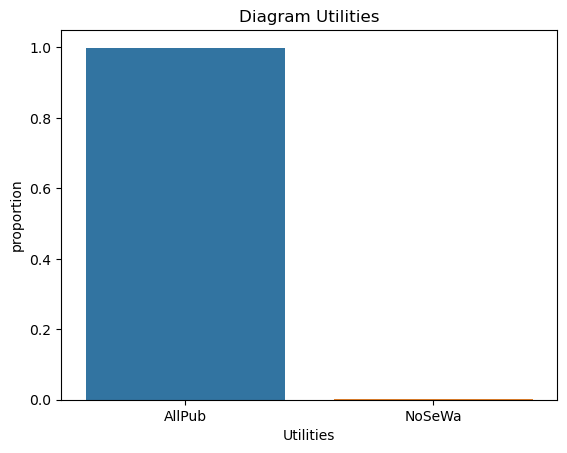

In [49]:
plt.title("Diagram Utilities")
plt.xlabel("x")
plt.ylabel("y")
sns.barplot(x=house_categorical['Utilities'].value_counts().index,
                 y=house_categorical['Utilities'].value_counts(normalize = True))
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

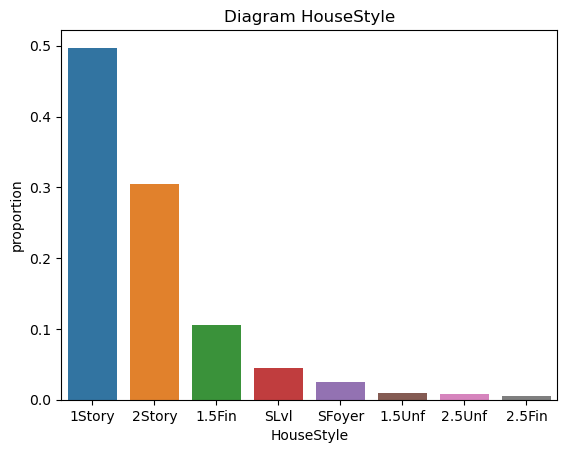

In [47]:
### Tulis kode Anda di sini
plt.title("Diagram HouseStyle")
plt.xlabel("x")
plt.ylabel("y")
sns.barplot(x=house_categorical["HouseStyle"].value_counts().index,
             y=house_categorical["HouseStyle"].value_counts(normalize = True))
plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

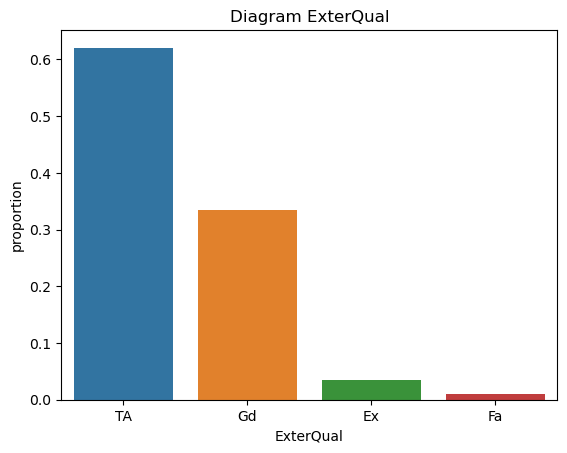

In [51]:
### Tulis kode Anda di sini
plt.title("Diagram ExterQual")
plt.xlabel("x")
plt.ylabel("y")
sns.barplot(x=house_categorical["ExterQual"].value_counts().index,
            y=house_categorical["ExterQual"].value_counts(normalize = True))
plt.show()

#### Analisis tentang variabel kategorikal

* `Utilities` berisi informasi mengenai fasilitas pada AllPub All public Utilities (E, G, W & S) paling banyak sedangkan No Sewa Electricity dan Gas Only tidak ada yang berminat
* `HouseStyle`seperti 1 lantai, 2 lantai, dst
       1Story	peminat paling banyak sekitar 50 % (One story)
       1.5Fin	peminat sekitar 10% One and one-half story: 2nd level finished
       1.5Unf	peminat sekitar 2% One and one-half story: 2nd level unfinished
       2Story	peminat sekitar 30% Two story
       2.5Fin	peminat paling sedikit sekitar 1 % Two and one-half story: 2nd level finished
       2.5Unf	peminat sekitar 2% Two and one-half story: 2nd level unfinished
       SFoyer	peminat sekitar 3% Split Foyer
       SLvl	peminat sekitar 5% Split Level
* `ExterQual` berisi informasi kualitas material eksterior
       ExExcel	lent peminat paling banyak sekitar 64%
       Gd	Good peminat sekitar 34%
       TA	Average/Typical peminat sekitar 8%
       Fa	Fair peminat paling sedikit sektar 2%

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_11628\3937917373.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Mediaan: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


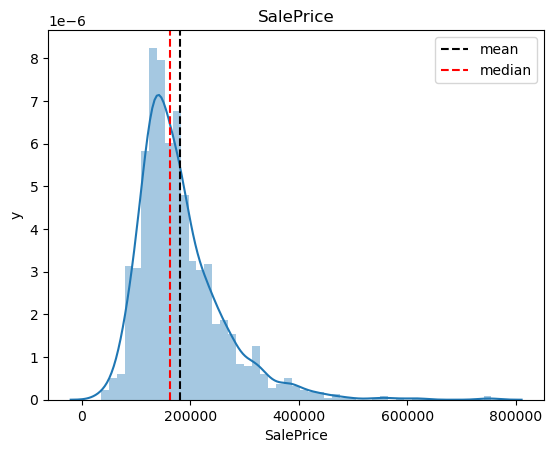

In [53]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

plt.title("SalePrice")
plt.xlabel("x")
plt.ylabel("y")

x=house_numeric["SalePrice"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(np.median(x), color = "r", linestyle = "--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Mediaan:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* **Analisis dan pertanyaan**
* Distribusi *right-skewed*.
* Kebanyakan data berada dalam range sekitar 100,000 sampai 300,000. Apakah ini wajar untuk harga rumah di US?
* Nilai selalu positif. Namun, kalau dimasukkan ke model ML hasil prediksi bisa jadi negatif kalau salah.
* Kita akan coba transformasi dengan log-scale.
    * Membuat distribusi terlihat seperti distribusi normal.
    * Memaksa nilai harga selalu positif, bahkan ketika dimasukkan kedalam model.

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_11628\1182888437.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


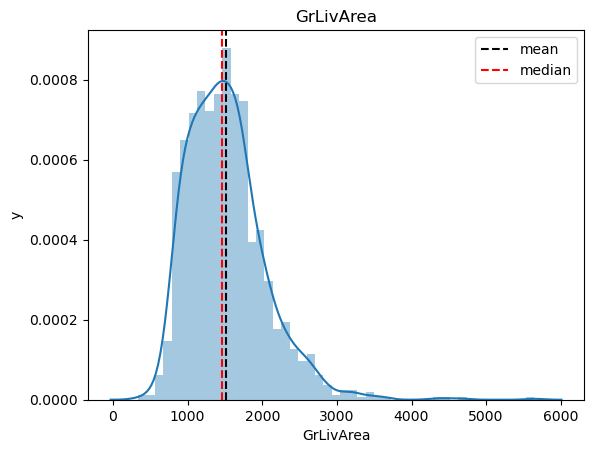

In [55]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

plt.title("GrLivArea")
plt.xlabel("x")
plt.ylabel("y")

x = house_numeric["GrLivArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* Beberapa variabel memiliki sparsity, contoh yang paling terlihat adalah `GrLivArea`.
* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet
* Variabel ini merepresentasikan luas area tinggal di atas permukaan tanah (tidak termasuk basement)
    * Pada variabel ini terlihat bahwa banyak value yang berada di daerah nilai 0.
    * Sehingga akan sedikit sulit untuk dianalisis.

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_11628\2964912643.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 480.0
Mean: 472.9801369863014
Std Dev: 213.80484145338076


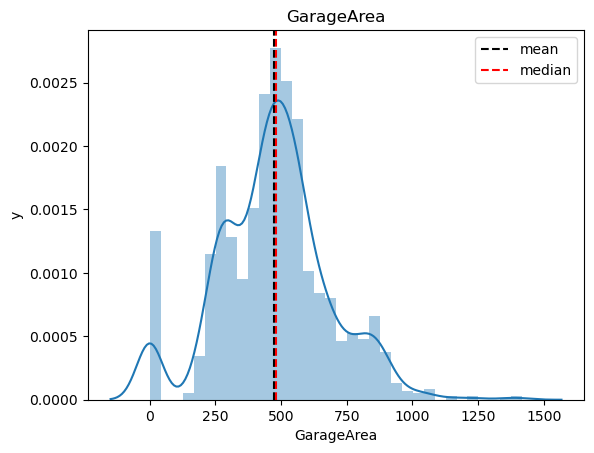

In [57]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

plt.title("GarageArea")
plt.xlabel("x")
plt.ylabel("y")

x = house_numeric["GarageArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(np.median(x), color = "r", linestyle ="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* Ternyata data ini memiliki nilai 400 sampai 500 yang cukup banyak.
* Jika dilihat dari deskripsi, `GarageArea: square feet`.
* Dari pernyataan tersebut kita dapat membuat suatu pernyataan.
* "Tidak semua rumah memiliki GarageArea".
* Dari pernyataan tersebut kita dapat melakukan analisis lebih jauh lagi:
    * Untuk analisis lebih jauh, kita dapat membuat kluster dari data tersebut.

## Pemrosesan Data Variabel Numerikal

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_11628\37780370.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


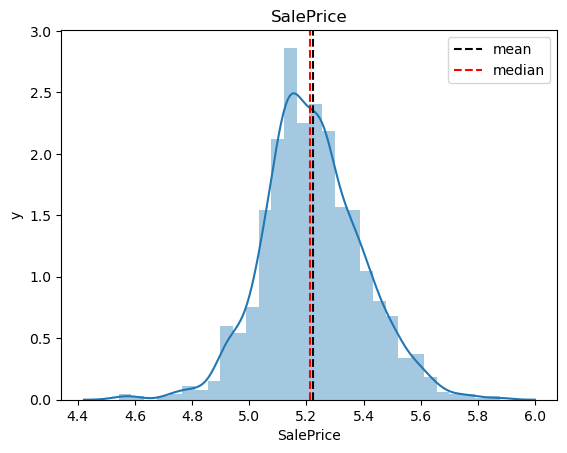

In [59]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

plt.title("SalePrice")
plt.xlabel("x")
plt.ylabel("y")

x = np.log10(house_numeric["SalePrice"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color = "k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color = "r", linestyle = "--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_11628\2493274282.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel = x.name, bins = 30)


Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.14485910869663873


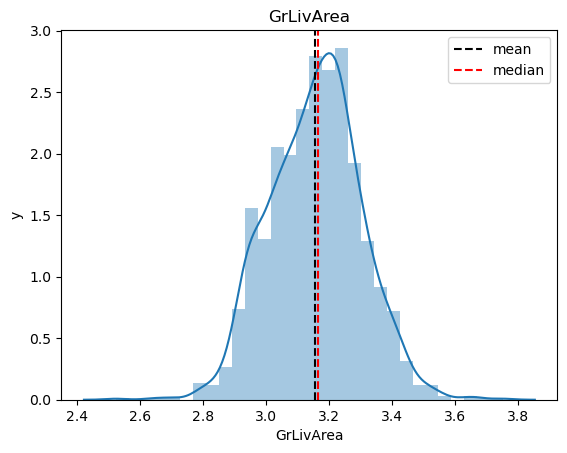

In [61]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

plt.title("GrLivArea")
plt.xlabel("x")
plt.ylabel("y")

x = np.log10(house_numeric["GrLivArea"])
sns.distplot(x, axlabel = x.name, bins = 30)
line1 = plt.axvline(x.mean(), color = "k", linestyle ="--", label = "mean")
line2 = plt.axvline(np.median(x), color = "r", linestyle = "--", label = "median")
first_legend = plt.legend(handles= [line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

In [73]:
# Menghilangkan nilai nol pada GarageArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

#plt.title("GarageArea")
#plt.xlabel("x")
#plt.ylabel("y")

#x = house_numeric["GarageArea"] [house_numeric ["GarageArea"] < 450 ]
#sns.distplot(x, axlabel = x.name, bins = 30)
#line1 = plt.axvline(x.mean(), color = "k", linestyle ="--", label = "mean")
#first_legend = plt.legend(handles = [line1, line2], loc=1)
#print("Median:", x.median())
#print("Mean:", x.mean())
#print("Std Dev:", x.std())
#plt.show()

#### Revisi GarageArea > 0

C:\Users\MaestroCom\AppData\Local\Temp\ipykernel_11628\563588582.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel = x.name, bins = 30)


Median: 484.0
Mean: 500.76214648295866
Std Dev: 185.68051979433156


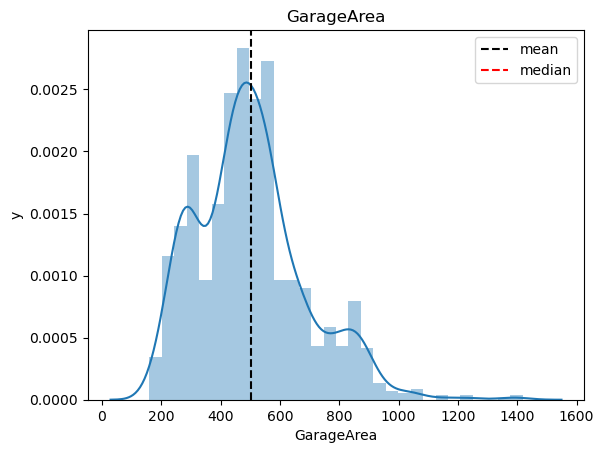

In [79]:
#filtering untuk variable kolom GarageArea > 0

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

plt.title("GarageArea")
plt.xlabel("x")
plt.ylabel("y")

x = house_numeric["GarageArea"] [house_numeric ["GarageArea"] > 0 ]
sns.distplot(x, axlabel = x.name, bins = 30)
line1 = plt.axvline(x.mean(), color = "k", linestyle ="--", label = "mean")
first_legend = plt.legend(handles = [line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### Insight

* Sebagian besar rumah memiliki GarageArea antara sekitar 400 hingga 600.
* Rata-rata GarageArea sedikit lebih besar dari median, yang menunjukkan bahwa distribusi mungkin sedikit condong ke kanan (positively skewed).
* Ada beberapa outlier yang memiliki GarageArea yang sangat besar (lebih dari 1000), tetapi jumlahnya sangat sedikit.
* Variasi dalam GarageArea cukup besar, seperti yang ditunjukkan oleh standar deviasi yang tinggi (185.68).
Diagram ini membantu dalam memahami bagaimana ukuran garasi tersebar di dataset dan memberikan wawasan tentang karakteristik umum dari ukuran garasi rumah yang dianalisis.

#### **Penjelasan dan analisis tentang pemrosesan data**

Dengan menggunakan transformasi skala maupun menghapus anomali distribusi menjadi lebih mendekati distribusi normal.
Untuk analisis variabel-variabel lainnya, dapat dicoba sendiri.
Namun perlu diingat, tujuan dari EDA adalah untuk eksplorasi.
Sehingga output dari EDA adalah berupa pertanyaan dan hipotesis yang siap untuk diuji pada proses lebih lanjut.
Berikut adalah plot histogram dari semua variabel:

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

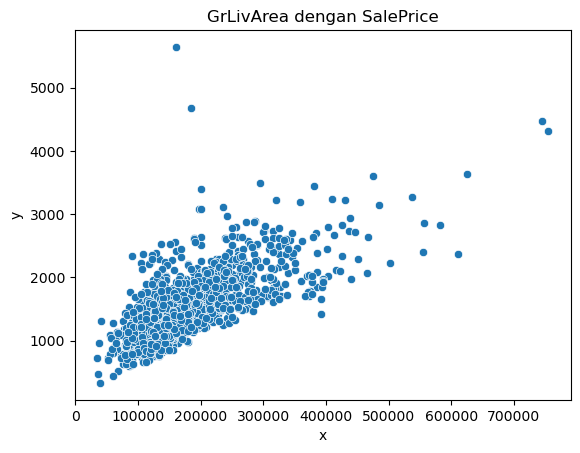

In [65]:
### Tulis kode Anda di sini)

plt.title("GrLivArea dengan SalePrice")
plt.xlabel("x")
plt.ylabel("y")

ax = sns.scatterplot(y="GrLivArea", x="SalePrice", data=house_numeric)
plt.show()   

# `GarageArea` dengan `SalePrice`

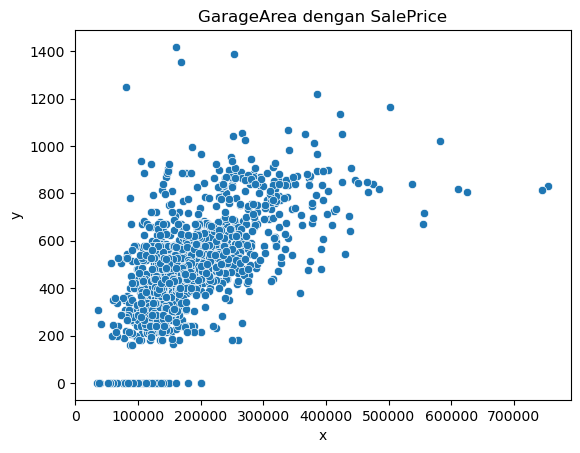

In [69]:
### Tulis kode Anda di sini)

plt.title("GarageArea dengan SalePrice")
plt.xlabel("x")
plt.ylabel("y")

ax = sns.scatterplot(y="GarageArea", x="SalePrice", data=house_numeric)
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* Kita dapat melihat bahwa variabel 1stFlrSF memiliki korelasi positif dengan variabel SalePrice
Namun, Dari situ kita juga dapat melihat bahwa data memiliki kemungkinan anomali.
Yaitu titik yang berada pada ujung kanan.